In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
data_path = Path("coin_XRP.csv")
xrp_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
xrp_df.sort_index(inplace=True)

data_path = Path("coin_Solana.csv")
sol_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sol_df.sort_index(inplace=True)

data_path = Path("coin_Dogecoin.csv")
doge_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
doge_df.sort_index(inplace=True)

data_path = Path("coin_Ethereum.csv")
eth_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_df.sort_index(inplace=True)

data_path = Path("coin_Bitcoin.csv")
bit_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
bit_df.sort_index(inplace=True)

data_path = Path("coin_Cardano.csv")
ada_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
ada_df.sort_index(inplace=True)

data_path = Path("coin_CryptocomCoin.csv")
cro_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
cro_df.sort_index(inplace=True)

data_path = Path("coin_Litecoin.csv")
ltc_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
ltc_df.sort_index(inplace=True)

data_path = Path("coin_Uniswap.csv")
uni_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
uni_df.sort_index(inplace=True)

data_path = Path("coin_USDCoin.csv")
usdc_df = pd.read_csv(data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdc_df.sort_index(inplace=True)

# Display a few rows
usdc_df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2018-10-09 23:59:59,1,USD Coin,USDC,1.00833,1.00003,1.00427,1.00686,108803.0,0.0
2018-10-10 23:59:59,2,USD Coin,USDC,1.01908,1.00397,1.00494,1.00962,711783.0,0.0
2018-10-11 23:59:59,3,USD Coin,USDC,1.03123,1.00173,1.00994,1.00978,4177290.0,0.0
2018-10-12 23:59:59,4,USD Coin,USDC,1.01871,1.00114,1.00861,1.01272,1322240.0,0.0
2018-10-13 23:59:59,5,USD Coin,USDC,1.02029,1.00355,1.01445,1.00743,698507.0,0.0


In [3]:
# Check data types
xrp_df.dtypes
sol_df.dtypes
doge_df.dtypes
eth_df.dtypes
bit_df.dtypes
ada_df.dtypes
cro_df.dtypes
ltc_df.dtypes
uni_df.dtypes
usdc_df.dtypes

SNo            int64
Name          object
Symbol        object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [4]:
# Rename "Close" column to be specific to this portoflio & visualize dataframe
xrp_df = xrp_df.rename(columns={"Close":"XRP"})
sol_df = sol_df.rename(columns={"Close":"SOL"})
doge_df = doge_df.rename(columns={"Close":"DOGE"})
eth_df = eth_df.rename(columns={"Close":"ETH"})
bit_df = bit_df.rename(columns={"Close":"BIT"})

ada_df = ada_df.rename(columns={"Close":"ADA"})
cro_df = cro_df.rename(columns={"Close":"CRO"})
ltc_df = ltc_df.rename(columns={"Close":"LTC"})
uni_df = uni_df.rename(columns={"Close":"UNI"})
usdc_df = usdc_df.rename(columns={"Close":"USDC"})


In [5]:
# Concat dataframes into one dataframe
all_crypto = pd.concat([xrp_df, sol_df, doge_df, eth_df, bit_df, ada_df, cro_df, ltc_df, uni_df, usdc_df], 
                      axis="columns", join="inner")
all_crypto.dropna()
all_crypto.head()

,SNo,Name,Symbol,High,Low,Open,XRP,Volume,Marketcap,SNo,...,Marketcap,SNo,Name,Symbol,High,Low,Open,USDC,Volume,Marketcap
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-18 23:59:59,2602,XRP,XRP,0.255716,0.247091,0.252284,0.250707,1.282350e+09,1.129243e+10,161,...,6.681116e+08,711,USD Coin,USDC,1.041002,0.988464,1.000356,0.999641,4.422483e+08,2.174402e+09
2020-09-19 23:59:59,2603,XRP,XRP,0.254101,0.248359,0.250530,0.251716,1.043485e+09,1.133788e+10,162,...,5.545076e+08,712,USD Coin,USDC,1.003806,0.997430,0.998770,1.001400,3.727863e+08,2.283061e+09
2020-09-20 23:59:59,2604,XRP,XRP,0.251663,0.243716,0.251663,0.246743,1.091284e+09,1.111390e+10,163,...,5.079857e+08,713,USD Coin,USDC,1.003537,0.999424,1.001564,1.001182,3.804176e+08,2.322713e+09
2020-09-21 23:59:59,2605,XRP,XRP,0.248110,0.230479,0.246818,0.232138,1.718958e+09,1.046879e+10,164,...,4.132392e+08,714,USD Coin,USDC,1.006842,0.999689,1.001177,1.001843,4.522036e+08,2.392455e+09
2020-09-22 23:59:59,2606,XRP,XRP,0.234743,0.230237,0.231848,0.233417,1.019584e+09,1.052649e+10,165,...,3.782762e+08,715,USD Coin,USDC,1.002476,0.999342,1.001931,1.000260,3.435525e+08,2.391425e+09


In [6]:
# Drop columns
all_crypto.drop(columns=["Symbol", "SNo","Name", "High", "Low", "Open", "Volume", "Marketcap"], inplace=True)
all_crypto.columns

Index(['XRP', 'SOL', 'DOGE', 'ETH', 'BIT', 'ADA', 'CRO', 'LTC', 'UNI', 'USDC'], dtype='object')

In [7]:
# Visulaze Dataframe
all_crypto.head()

,XRP,SOL,DOGE,ETH,BIT,ADA,CRO,LTC,UNI,USDC
Date,,,,,,,,,,
2020-09-18 23:59:59,0.250707,3.107940,0.002804,384.364542,10944.585805,0.091081,0.166270,48.462816,6.897257,0.999641
2020-09-19 23:59:59,0.251716,3.028891,0.002794,385.544384,11094.346276,0.091657,0.167822,48.676832,5.724464,1.001400
2020-09-20 23:59:59,0.246743,2.870903,0.002778,371.052826,10938.271289,0.089433,0.159568,47.100530,5.244195,1.001182
2020-09-21 23:59:59,0.232138,2.782509,0.002630,341.786074,10462.259619,0.080428,0.152256,43.390220,4.266079,1.001843
2020-09-22 23:59:59,0.233417,2.915519,0.002656,344.503162,10538.460321,0.081754,0.152646,44.545049,3.905138,1.000260


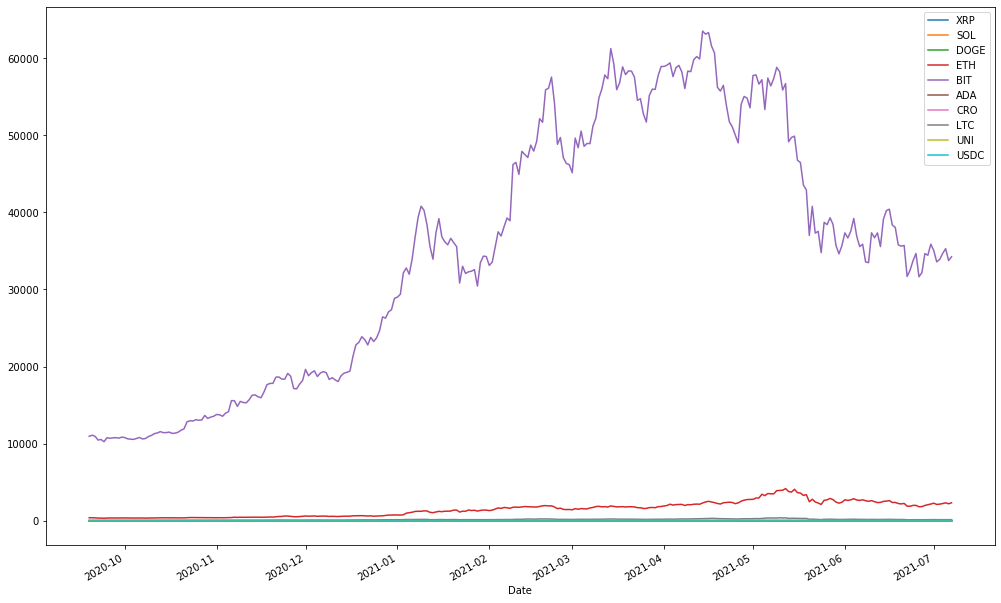

In [8]:
#Plot data
all_crypto.plot(figsize=(17,11))

In [9]:
# Calculate daily return with pct_change function
crypto_returns = all_crypto.pct_change()
crypto_returns.head()

,XRP,SOL,DOGE,ETH,BIT,ADA,CRO,LTC,UNI,USDC
Date,,,,,,,,,,
2020-09-18 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-19 23:59:59,0.004025,-0.025434,-0.003731,0.003070,0.013684,0.006322,0.009333,0.004416,-0.170038,0.001759
2020-09-20 23:59:59,-0.019755,-0.052160,-0.005637,-0.037587,-0.014068,-0.024265,-0.049182,-0.032383,-0.083898,-0.000218
2020-09-21 23:59:59,-0.059194,-0.030790,-0.053150,-0.078875,-0.043518,-0.100691,-0.045826,-0.078774,-0.186514,0.000661
2020-09-22 23:59:59,0.005511,0.047802,0.009770,0.007950,0.007283,0.016490,0.002565,0.026615,-0.084607,-0.001581


In [10]:
# Imply standard deviation function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = crypto_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

USDC    0.015920
BIT     0.682511
ETH     0.925537
LTC     1.037552
CRO     1.132215
ADA     1.176042
UNI     1.449326
SOL     1.479598
XRP     1.547933
DOGE    3.882266
dtype: float64

In [11]:
# Drop the five stocks with the highest volatility in daily returns
crypto_returns.drop(columns=["DOGE", "XRP", "SOL", "UNI", "ADA"], inplace=True)
crypto_returns.head()

,ETH,BIT,CRO,LTC,USDC
Date,,,,,
2020-09-18 23:59:59,NaN,NaN,NaN,NaN,NaN
2020-09-19 23:59:59,0.003070,0.013684,0.009333,0.004416,0.001759
2020-09-20 23:59:59,-0.037587,-0.014068,-0.049182,-0.032383,-0.000218
2020-09-21 23:59:59,-0.078875,-0.043518,-0.045826,-0.078774,0.000661
2020-09-22 23:59:59,0.007950,0.007283,0.002565,0.026615,-0.001581


In [12]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
#ETH, BIT, CRO, LTC, USDC
weights = [0.25, 0.10, 0.25, 0.25, 0.15]
crypto_gains = crypto_returns.dot(weights)
crypto_gains.head()

Date
2020-09-18 23:59:59         NaN
2020-09-19 23:59:59    0.005837
2020-09-20 23:59:59   -0.031227
2020-09-21 23:59:59   -0.055122
2020-09-22 23:59:59    0.009774
Freq: D, dtype: float64

In [13]:
# Imply `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + crypto_gains).cumprod()
cumulative_returns.head()

Date
2020-09-18 23:59:59         NaN
2020-09-19 23:59:59    1.005837
2020-09-20 23:59:59    0.974427
2020-09-21 23:59:59    0.920715
2020-09-22 23:59:59    0.929714
Freq: D, dtype: float64

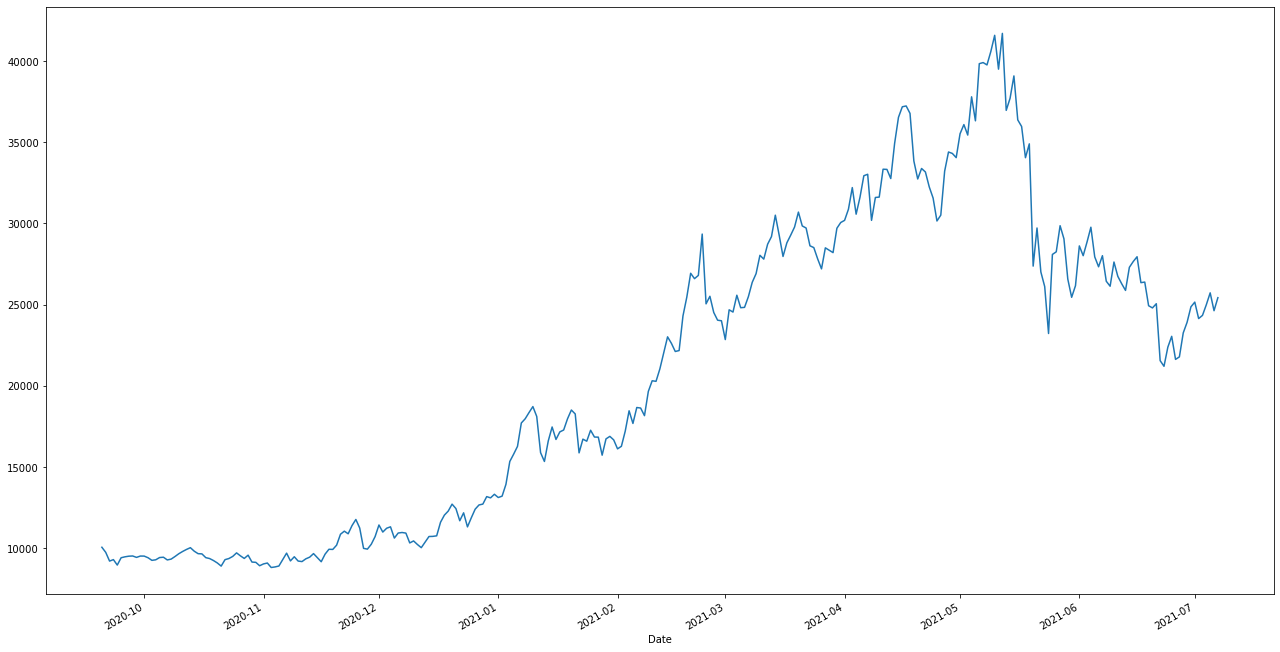

In [14]:
# Plot return with initial invstment of $10000
initial_investment = 10000
cumulative_profits = initial_investment * cumulative_returns
cumulative_profits.plot(figsize=(22,12))

In [15]:
# Apply std function
all_crypto_std = all_crypto.std()
all_crypto_std.head()

XRP         0.402068
SOL        15.461236
DOGE        0.159180
ETH       946.502150
BIT     16544.673749
dtype: float64

In [16]:
crypto_gains_std = crypto_gains.std()
crypto_gains_std

0.045511260824823034

In [17]:
sharpe_ratio = (crypto_gains.mean() * 252) / (all_crypto_std * np.sqrt(252))
sharpe_ratio

XRP      0.168265
SOL      0.004376
DOGE     0.425017
ETH      0.000071
BIT      0.000004
ADA      0.109996
CRO      1.271734
LTC      0.000868
UNI      0.005295
USDC    83.850261
dtype: float64

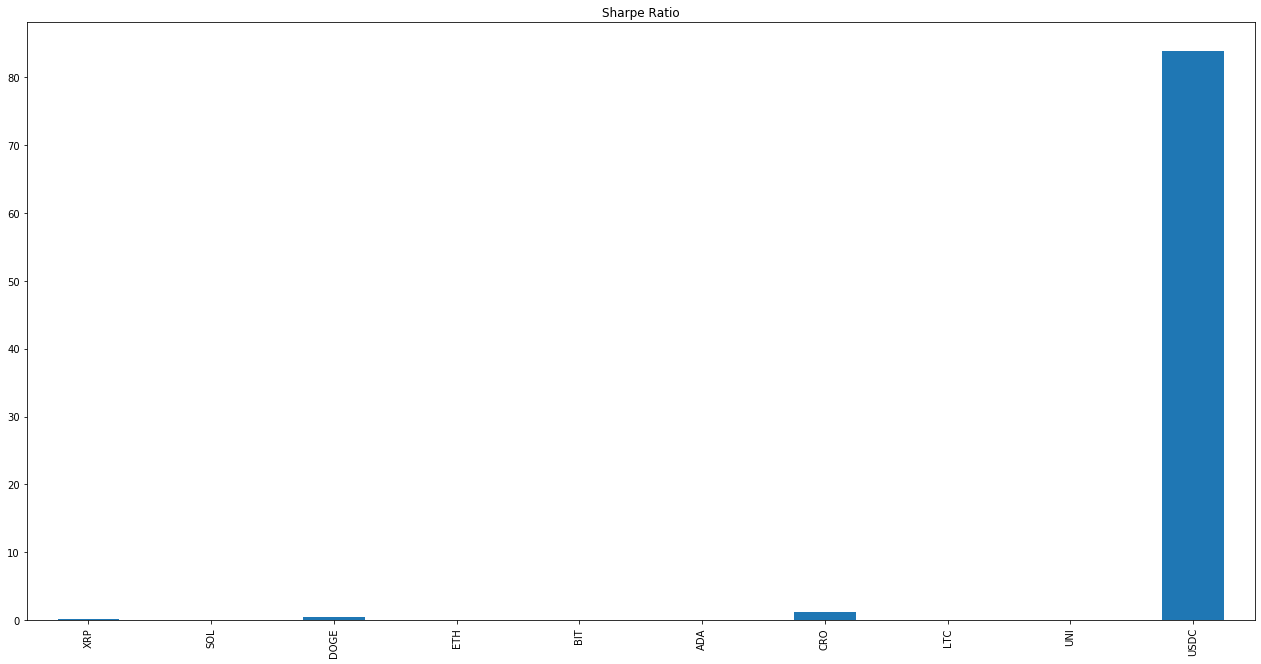

In [18]:
# Plot sharpe ratio
sharpe_ratio.plot(kind="bar", title="Sharpe Ratio", figsize=(22,11))

## Reset Daily Returns Dataframe

In [19]:
# Calculate daily return with pct_change function
crypto_returns = all_crypto.pct_change()
crypto_returns.head()

,XRP,SOL,DOGE,ETH,BIT,ADA,CRO,LTC,UNI,USDC
Date,,,,,,,,,,
2020-09-18 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-19 23:59:59,0.004025,-0.025434,-0.003731,0.003070,0.013684,0.006322,0.009333,0.004416,-0.170038,0.001759
2020-09-20 23:59:59,-0.019755,-0.052160,-0.005637,-0.037587,-0.014068,-0.024265,-0.049182,-0.032383,-0.083898,-0.000218
2020-09-21 23:59:59,-0.059194,-0.030790,-0.053150,-0.078875,-0.043518,-0.100691,-0.045826,-0.078774,-0.186514,0.000661
2020-09-22 23:59:59,0.005511,0.047802,0.009770,0.007950,0.007283,0.016490,0.002565,0.026615,-0.084607,-0.001581


In [20]:
correlation = crypto_returns.corr()
correlation

,XRP,SOL,DOGE,ETH,BIT,ADA,CRO,LTC,UNI,USDC
XRP,1.000000,0.364780,0.124751,0.489068,0.448689,0.435116,0.432728,0.560076,0.378905,-0.099920
SOL,0.364780,1.000000,0.103556,0.499347,0.340987,0.387496,0.382813,0.395553,0.373443,-0.090600
DOGE,0.124751,0.103556,1.000000,0.200093,0.271011,0.193467,0.165408,0.252392,0.058113,-0.054572
ETH,0.489068,0.499347,0.200093,1.000000,0.726308,0.629777,0.524725,0.789283,0.596897,-0.067308
BIT,0.448689,0.340987,0.271011,0.726308,1.000000,0.536731,0.581834,0.757880,0.448729,-0.056161
ADA,0.435116,0.387496,0.193467,0.629777,0.536731,1.000000,0.489467,0.587774,0.501810,-0.024436
CRO,0.432728,0.382813,0.165408,0.524725,0.581834,0.489467,1.000000,0.549687,0.370527,0.021483
LTC,0.560076,0.395553,0.252392,0.789283,0.757880,0.587774,0.549687,1.000000,0.520372,-0.021242
UNI,0.378905,0.373443,0.058113,0.596897,0.448729,0.501810,0.370527,0.520372,1.000000,-0.024322
USDC,-0.099920,-0.090600,-0.054572,-0.067308,-0.056161,-0.024436,0.021483,-0.021242,-0.024322,1.000000


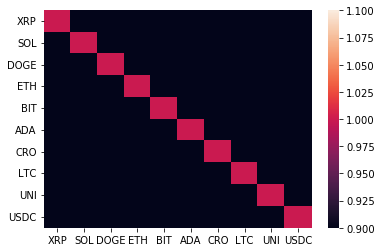

In [21]:
# import libray and use heatmap funtion to visylaize correlation table
import seaborn as sns
sns.heatmap(correlation, vmin=1, vmax=1)

In [22]:
# Alternatively, sum total correlation for each stock
correlation.sum(axis=0).sort_values()

USDC    0.582922
DOGE    2.314220
SOL     3.757375
XRP     4.134193
UNI     4.224473
CRO     4.518672
ADA     4.737203
BIT     5.056008
ETH     5.388190
LTC     5.391775
dtype: float64

## Drop the two most correlated

In [23]:
noncorrelated_crypto_gains = crypto_returns.drop(columns=["XRP", "USDC"])
noncorrelated_crypto_gains.head()

,SOL,DOGE,ETH,BIT,ADA,CRO,LTC,UNI
Date,,,,,,,,
2020-09-18 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-19 23:59:59,-0.025434,-0.003731,0.003070,0.013684,0.006322,0.009333,0.004416,-0.170038
2020-09-20 23:59:59,-0.052160,-0.005637,-0.037587,-0.014068,-0.024265,-0.049182,-0.032383,-0.083898
2020-09-21 23:59:59,-0.030790,-0.053150,-0.078875,-0.043518,-0.100691,-0.045826,-0.078774,-0.186514
2020-09-22 23:59:59,0.047802,0.009770,0.007950,0.007283,0.016490,0.002565,0.026615,-0.084607


## Evaluate Reward to Risk(Sharpe Ratio) of minimum correlated crypto


In [24]:
sharpe_ratio = (noncorrelated_crypto_gains.mean() * 252) / (noncorrelated_crypto_gains.std() * np.sqrt(252))
sharpe_ratio

SOL     2.134604
DOGE    1.905102
ETH     2.152474
BIT     1.788478
ADA     2.598167
CRO     0.307811
LTC     1.413568
UNI     1.396420
dtype: float64

In [25]:
# Drop the 3 lowest Sharpe Ratio Crypto
condition_daily_gains = noncorrelated_crypto_gains.drop(columns=["CRO", "UNI", "LTC"])
condition_daily_gains.head()

,SOL,DOGE,ETH,BIT,ADA
Date,,,,,
2020-09-18 23:59:59,NaN,NaN,NaN,NaN,NaN
2020-09-19 23:59:59,-0.025434,-0.003731,0.003070,0.013684,0.006322
2020-09-20 23:59:59,-0.052160,-0.005637,-0.037587,-0.014068,-0.024265
2020-09-21 23:59:59,-0.030790,-0.053150,-0.078875,-0.043518,-0.100691
2020-09-22 23:59:59,0.047802,0.009770,0.007950,0.007283,0.016490


### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

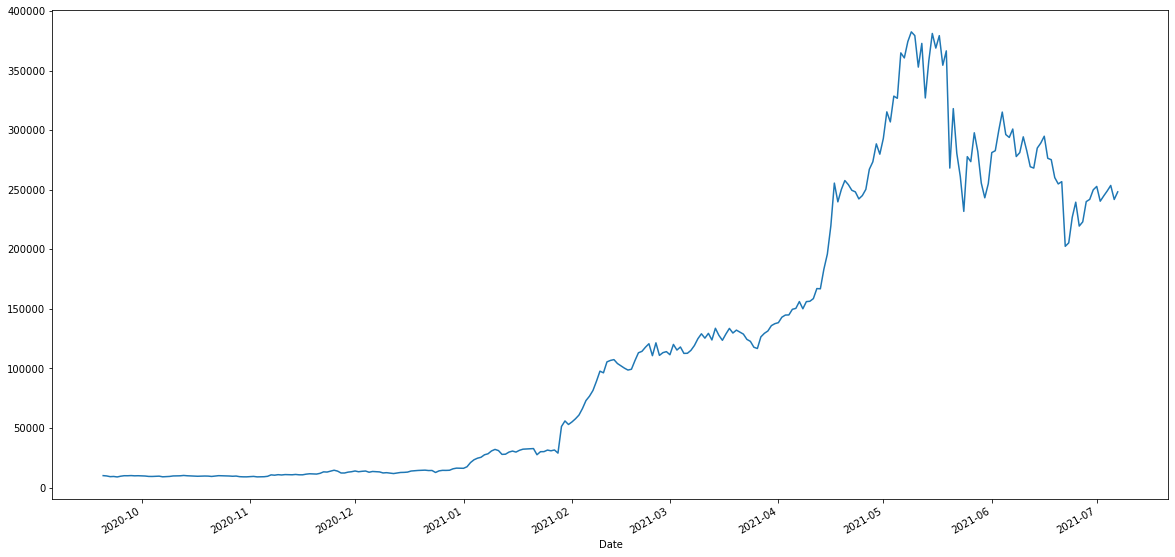

In [26]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.2, .2, .2, .2, .2]
condition_portfolio_gains = condition_daily_gains.dot(weights)
condition_cumulative_gains = (1 + condition_portfolio_gains).cumprod()
condition_cumulative_profits = (initial_investment * condition_cumulative_gains)
condition_cumulative_profits.plot(figsize=(20,10))

### Evaluate Investment in Non-Correlated (Diversified) Portfolio

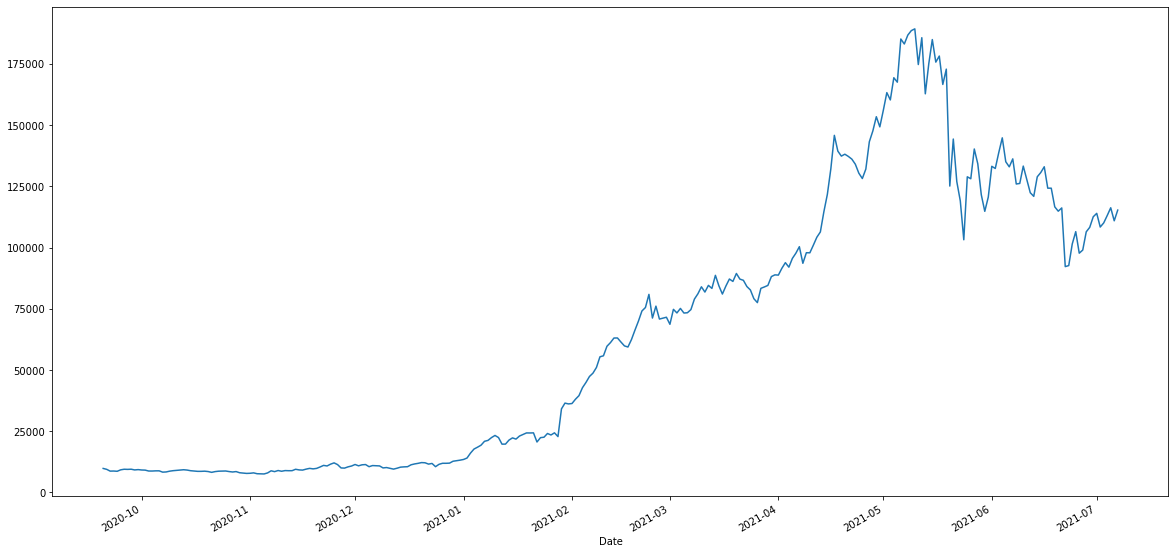

In [27]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 10000
weights = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
noncorrelated_portfolio_gains = noncorrelated_crypto_gains.dot(weights)
noncorrelated_cumulative_gains = (1 + noncorrelated_portfolio_gains).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_gains)
noncorrelated_cumulative_profits.plot(figsize=(20,10))

### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

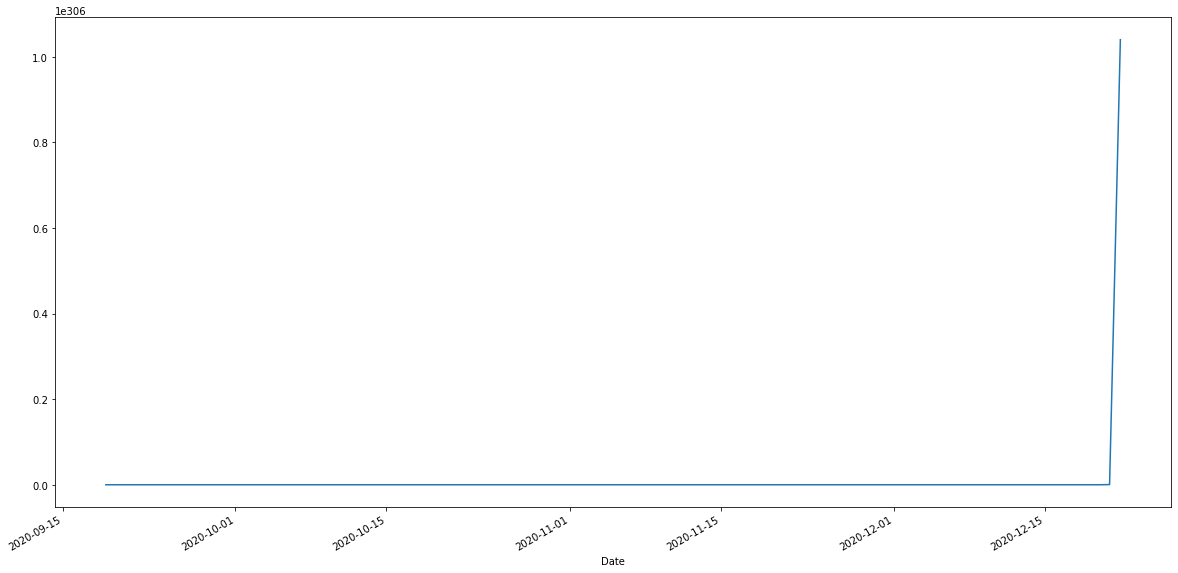

In [28]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio
initial_investment = 10000
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
unoptimized_portfolio_gains = all_crypto.dot(weights)
unoptimized_cumulative_gains = (1 + unoptimized_portfolio_gains).cumprod()
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_gains)
unoptimized_cumulative_profits.plot(figsize=(20,10))

## Overlay Hypothetical Portfolio Investments

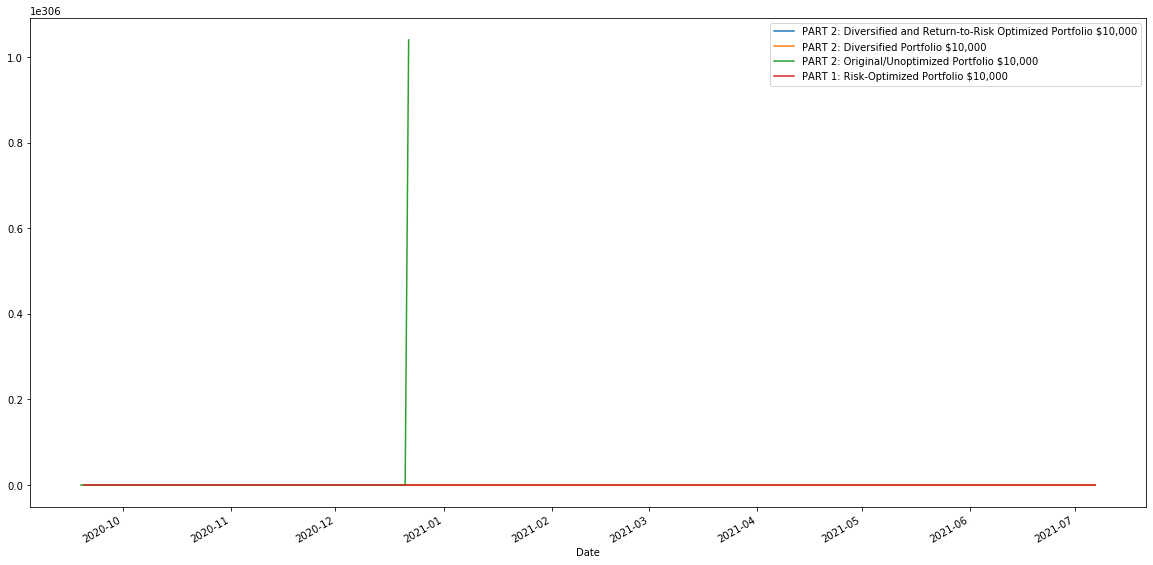

In [29]:
# Set the figure of the chart and plot each data trend on the single figure
ax = condition_cumulative_profits.plot(figsize=(20,10))
noncorrelated_cumulative_profits.plot(ax=ax)
unoptimized_cumulative_profits.plot(ax=ax)
cumulative_profits.plot(ax=ax)

ax.legend(['PART 2: Diversified and Return-to-Risk Optimized Portfolio $10,000', 
           'PART 2: Diversified Portfolio $10,000', 
           'PART 2: Original/Unoptimized Portfolio $10,000', 
           'PART 1: Risk-Optimized Portfolio $10,000'])